In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:

import pandas as pd

idxs = ['Baseline', '$r_{0,0}$', '$r_{0,1}$', '$r_{0,2}$', '$r_{0,4}$', '$r_{0,5}$', '$r_{1,4}$',
        '$r_{1,2}$', '$r_{1,6}$', '$r_{2,0}$', '$r_{2,1}$', '$r_{2,2}$', '$r_{3,0}$', '$r_{3,1}$',
        '$r_{3,2}$', '$r_{4,0}$', '$r_{4,2}$', '$r_{5,2}$']

df0 = pd.read_csv('results/result_2/p_f0.csv', sep=";")
df0 = pd.DataFrame(df0.values[:, 1:],
                   index=idxs)
df0 = df0.T

df1 = pd.read_csv('results/result_2/p_f1.csv', sep=";")
df1 = pd.DataFrame(df1.values[:, 1:],
                   index=idxs)
df1 = df1.T

df2 = pd.read_csv('results/result_2/p_f2.csv', sep=";")
df2 = pd.DataFrame(df2.values[:, 1:],
                   index=idxs)
df2 = df2.T

df3 = pd.read_csv('results/result_2/p_f3.csv', sep=";")
df3 = pd.DataFrame(df3.values[:, 1:],
                   index=idxs)
df3 = df3.T

In [3]:
mean0 = df0['Baseline'].mean()
df0 = df0 / mean0 - 1
df0 = df0.drop('$r_{1,6}$', axis=1)
df0 = df0.drop('Baseline', axis=1) * 100

mean1 = df1['Baseline'].mean()
df1 = df1 / mean1 - 1
df1 = df1.drop('$r_{1,6}$', axis=1)
df1 = df1.drop('Baseline', axis=1) * 100

mean2 = df2['Baseline'].mean()
df2 = df2 / mean2 - 1
df2 = df2.drop('$r_{1,6}$', axis=1)
df2 = df2.drop('Baseline', axis=1) * 100

mean3 = df3['Baseline'].mean()
df3 = df3 / mean3 - 1
df3 = df3.drop('$r_{1,6}$', axis=1)
df3 = df3.drop('Baseline', axis=1) * 100

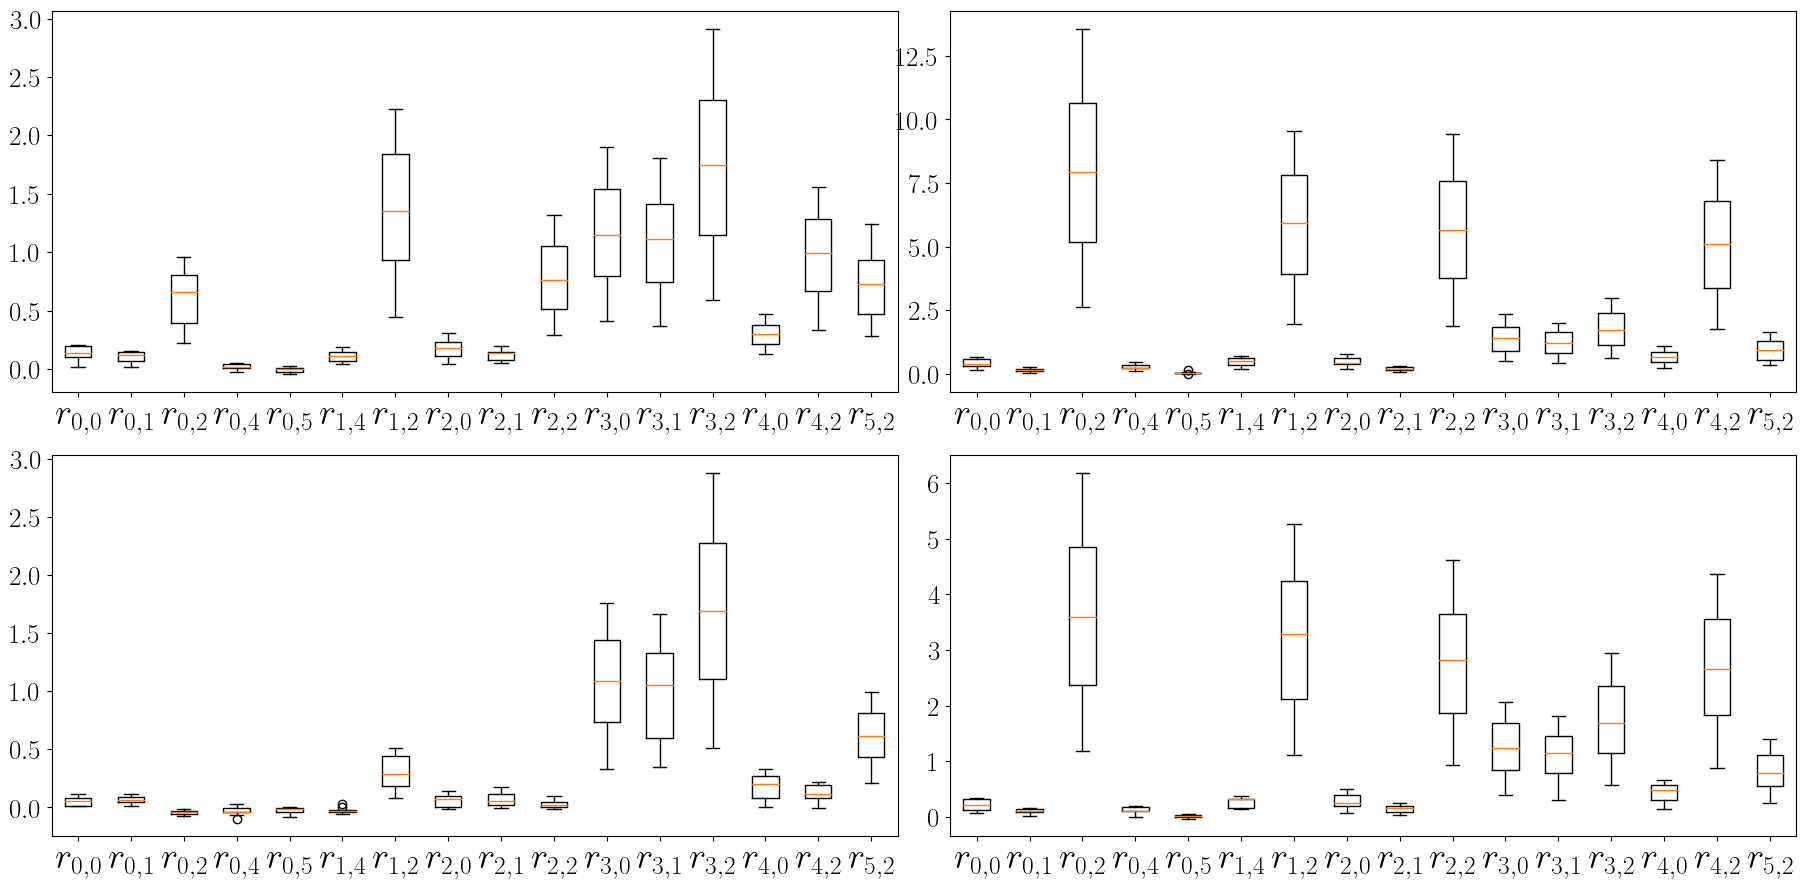

In [14]:
red_circle = dict(markerfacecolor='red',
                  marker='o', markeredgecolor='white')

figsize = 9
height = figsize / 0.5
scale = (figsize) / 6.5
x_label_fontsize = 19
y_label_fontsize = 14
eq_fontsize = 11

fig, axs = plt.subplots(2, 2, figsize=(height, figsize))

import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams.update({
    "text.usetex": True,
})

plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{mathtools}"

axs[0, 0].boxplot(df0, labels=df0.columns[:])
axs[0, 0].tick_params(axis='y', labelsize=y_label_fontsize*scale)
axs[0, 0].tick_params(axis='x', labelsize=x_label_fontsize*scale)
axs[0, 0].set_ylabel('%', fontsize=y_label_fontsize*scale)

axs[0, 1].boxplot(df1, labels=df1.columns[:])
axs[0, 1].tick_params(axis='y', labelsize=y_label_fontsize*scale)
axs[0, 1].tick_params(axis='x', labelsize=x_label_fontsize*scale)
axs[0, 1].set_ylabel('%', fontsize=y_label_fontsize*scale)

axs[1, 0].boxplot(df2, labels=df2.columns[:])
axs[1, 0].tick_params(axis='y', labelsize=y_label_fontsize*scale)
axs[1, 0].tick_params(axis='x', labelsize=x_label_fontsize*scale)
axs[1, 0].set_ylabel('%', fontsize=y_label_fontsize*scale)

axs[1, 1].boxplot(df3, labels=df3.columns[:])
axs[1, 1].tick_params(axis='y', labelsize=y_label_fontsize*scale)
axs[1, 1].tick_params(axis='x', labelsize=x_label_fontsize*scale)
axs[1, 1].set_ylabel('%', fontsize=y_label_fontsize*scale)

plt.tight_layout()
plt.show()
#fig.sSavefig("figure.png")

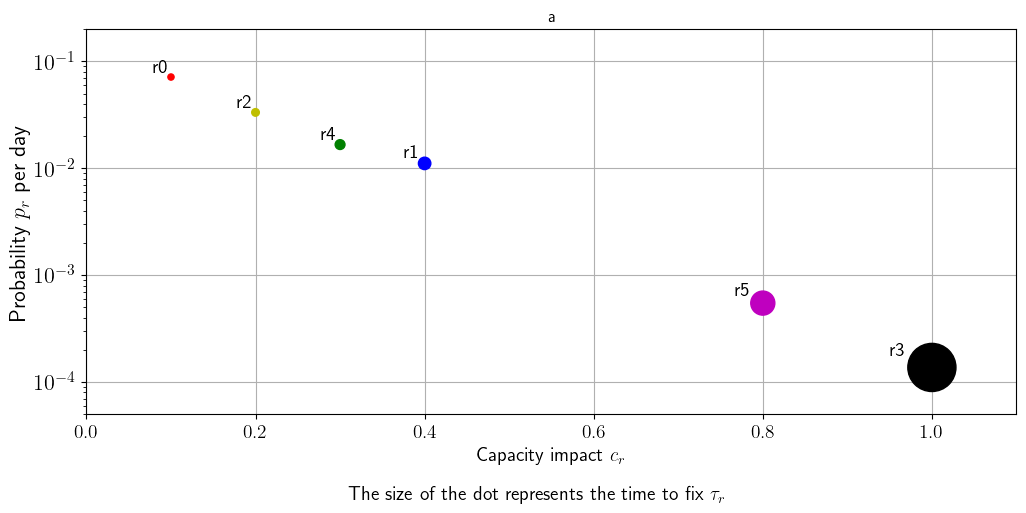

In [15]:
probability = np.array([1 / 14, 1 / 90, 1 / 30, 1 / (20 * 365), 1 / 60, 1 / (5 * 365)])
impact = np.array([0.1, 0.4, 0.2, 1.0, 0.3, 0.8])
time_fix = np.array([2, 8, 3, 120, 5, 30]) * 10
risk_labels = ['r0', 'r1', 'r2', 'r3', 'r4', 'r5']
colors = ['r', 'b', 'y', 'k', 'g', 'm']

fig, ax = plt.subplots(figsize=(12, 5))

ax.scatter(impact, probability, s=time_fix, color=colors)
ax.semilogy()
ax.set_title('a')
ax.set_xlim(-0, 1.1)
ax.set_ylim(0.00005, 0.2)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.grid()
ax.set_axisbelow(True)
ax.set_xlabel('Capacity impact $c_r$', fontsize=14)
# ax.set_yticks(np.concatenate((np.arange(0.01, 0.1, 0.01), np.arange(0.001, 0.01, 0.001), np.arange(0.0001, 0.001, 0.0001))))
ax.set_ylabel('Probability $p_r$ per day', fontsize=16)
txt = "The size of the dot represents the time to fix $\\tau_r$"
fig.text(0.5, -0.06, txt, wrap=True, horizontalalignment='center', fontsize=14)

for (label, xi, yi, t_f) in zip(risk_labels, impact, probability, time_fix):
    ax.text(xi * (-0.0008 * np.sqrt(t_f) + 1) - 0.012, yi * (0.006 * np.sqrt(t_f) + 1) - 0.01 * yi, label, va='bottom',
            ha='center', fontsize=14)

plt.show()